## Random Forest Implementation 

### Load Libraries 

In [8]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [6]:
warnings.filterwarnings("ignore")

### Load Data 

In [9]:
breast_cancer = datasets.load_breast_cancer()

In [51]:
X = pd.DataFrame(data=breast_cancer.data,columns=breast_cancer.feature_names)

In [52]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
y_label = pd.DataFrame(data=breast_cancer.target_names,columns=['Target'])
y_label.head()

,Target
0,malignant
1,benign


In [54]:
y = pd.DataFrame(data=breast_cancer.target,columns=['Target'])

In [56]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [58]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### Split the data 

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Train the Model 

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier()

### Make Prediction on Test Set  

In [64]:
pred = rf.predict(X_test)

### Check the performance of the Model 

In [79]:
from sklearn.metrics import roc_curve,roc_auc_score

In [76]:
y_prob = rf.predict_proba(X_test)
y_prob_benign = y_prob[:,1]

In [80]:
fpr,tpr,threshold = roc_curve(y_test,y_prob_benign)

In [81]:
roc_auc_score(y_test,y_prob_benign)

0.9975014697236919

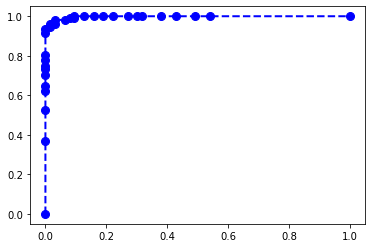

In [90]:
plt.plot(fpr,tpr,'bo--', linewidth=2, markersize=8)

### Hyperparameter Tuning 

In [91]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator,n_jobs=1)
    rf.fit(X_train,y_train)
    train_results.append(roc_auc_score(y_train,rf.predict_proba(X_train)[:,1]))
    test_results.append(roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))    

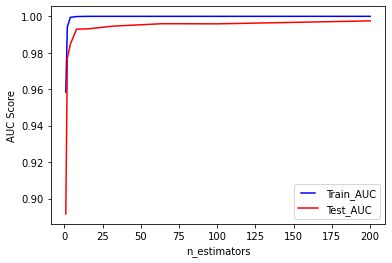

In [97]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results,"b",label="Train_AUC")
line2, = plt.plot(n_estimators,test_results,"r",label="Test_AUC")
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

It looks like at n_estimators=35 the test accuracy is very good along with training accuracy. So Low variance and low bias. We can stick to this value and use it in our final model.<br/><br/>
Similarly we can also check for optimum value of 'max_depth','min_samples_split','min_samples_leaf','max_features' and 'max_leaf_nodes'.